In [21]:
!pip install pandas seaborn scipy

In [10]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.4 MB 1.1 MB/s eta 0:00:08
      --------------------------------------- 0.2/8.4 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.2/8.4 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/8.4 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/8.4 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/8.4 MB 2.5 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/8.4 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/8.4 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/8.4 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/8.4 MB 2.2 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/8.4 MB 1.9 MB/s eta 0

In [6]:
# Importing Libraries

import numpy as np
import pandas as pd
import scipy
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from keras.applications.xception import Xception

from keras.callbacks import EarlyStopping,ModelCheckpoint

In [7]:
traingen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

valgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)

In [8]:
train_data = traingen.flow_from_directory("data\dataset\train",
                                         target_size=(299,299),
                                          seed = 123,
                                          batch_size=32,
                                          class_mode = "categorical"
                                         )
val_data = valgen.flow_from_directory("data\dataset\val",
                                     target_size=(299,299),
                                      seed = 123,
                                      batch_size=32,
                                      class_mode = "categorical"
                                     )

test_data = testgen.flow_from_directory("data\test",
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )

Found 3996 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.
Found 585 images belonging to 20 classes.


In [9]:
cl = train_data.class_indices
classes = list(cl.keys())
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [10]:
cl_fq = train_data.classes

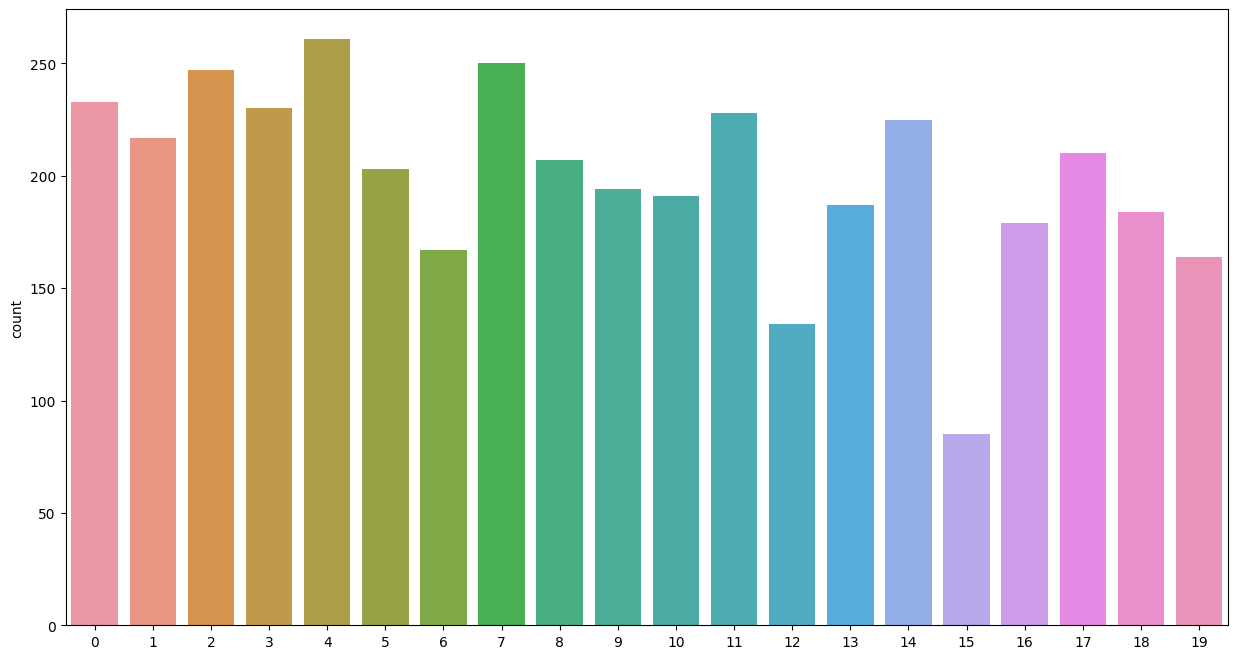

In [30]:
plt.figure(figsize=[15,8])
sns.countplot(x =cl_fq);

In [11]:
# one Batch
x,y = next(train_data)
x.shape

(32, 299, 299, 3)

In [12]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

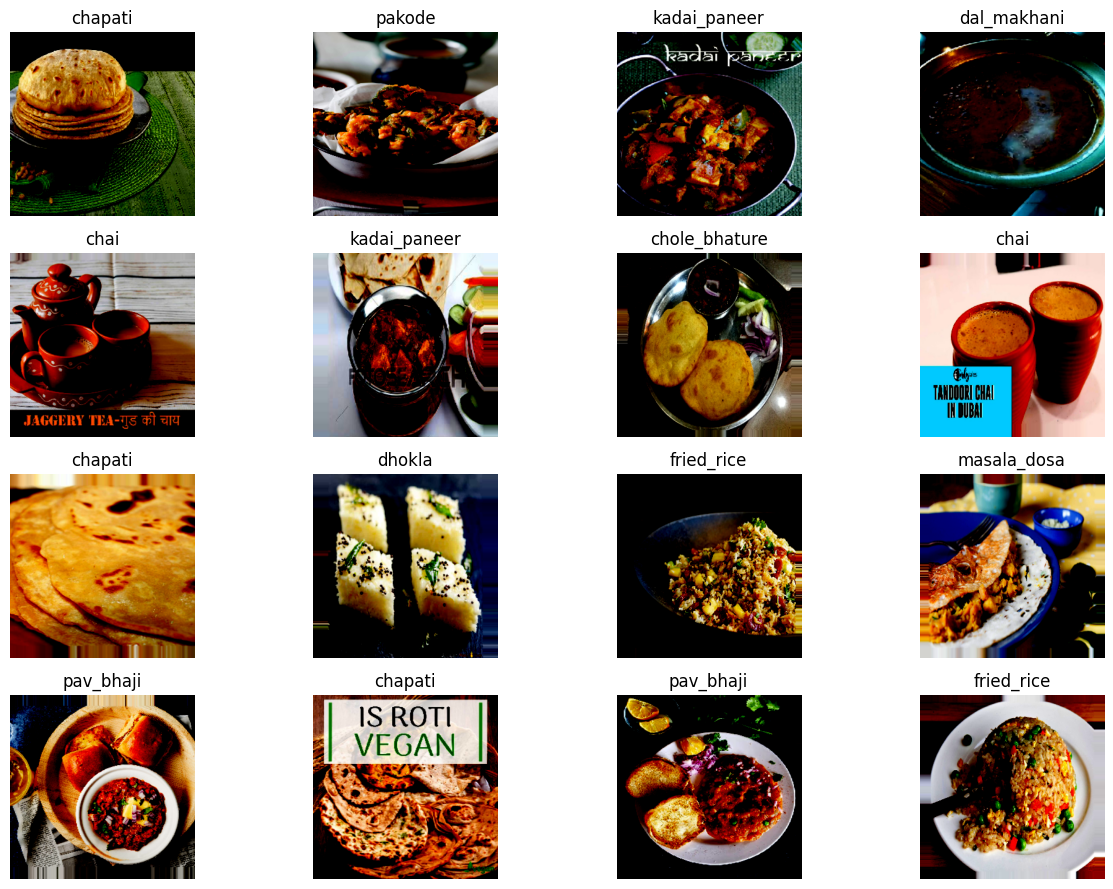

In [13]:
plotImages(x,y)

In [35]:
# Taking Pre-Trained Model:

In [14]:
base_model = Xception(include_top=False,
                              weights="imagenet",
                              input_shape=(299,299,3),
                        )
base_model.trainable = False

In [15]:
# Transfer to main model
image_input = Input(shape=(299,299,3))

x = base_model(image_input,training = False)

x = GlobalAveragePooling2D()(x)

x = Dense(128,activation = "relu")(x)

image_output = Dense(20,activation="softmax")(x)

model = Model(image_input,image_output)

In [20]:
# Compile



In [21]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

In [22]:
# Callbacks
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model.h5",verbose= 1 ,save_best_only=True)]

In [23]:
# Train
hist = model.fit(train_data,epochs=22,validation_data=val_data,callbacks=my_calls)

Epoch 1/22
125/125 [==============================] - ETA: 0s - loss: 1.0386 - accuracy: 0.7290
Epoch 1: val_loss improved from inf to 0.60407, saving model to Model.h5
125/125 [==============================] - 453s 4s/step - loss: 1.0386 - accuracy: 0.7290 - val_loss: 0.6041 - val_accuracy: 0.8256
Epoch 2/22
125/125 [==============================] - ETA: 0s - loss: 0.4210 - accuracy: 0.8759
Epoch 2: val_loss improved from 0.60407 to 0.49447, saving model to Model.h5
125/125 [==============================] - 404s 3s/step - loss: 0.4210 - accuracy: 0.8759 - val_loss: 0.4945 - val_accuracy: 0.8536
Epoch 3/22
125/125 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.9169
Epoch 3: val_loss improved from 0.49447 to 0.43859, saving model to Model.h5
125/125 [==============================] - 439s 4s/step - loss: 0.2923 - accuracy: 0.9169 - val_loss: 0.4386 - val_accuracy: 0.8760
Epoch 4/22
125/125 [==============================] - ETA: 0s - loss: 0.2354 - accuracy: 

In [24]:
# Test
model.evaluate(test_data)

19/19 [==============================] - 36s 2s/step - loss: 0.6343 - accuracy: 0.8376


[0.6343231201171875, 0.8376068472862244]

In [17]:
# Accuracy & Loss Graph

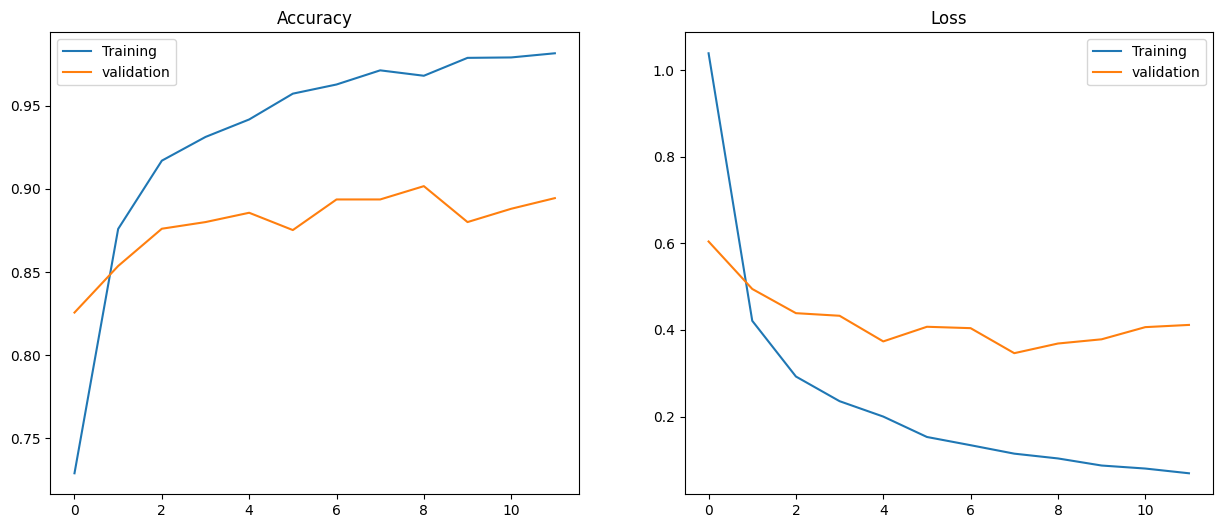

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [26]:
saved_model = load_model("./Model.h5")

In [27]:
pred = saved_model.predict(test_data,verbose=1)

19/19 [==============================] - 41s 2s/step


In [28]:
pred = [np.argmax(i) for i in pred]
y_test = test_data.classes

In [22]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       0.76      0.81      0.79        27
           2       1.00      0.86      0.92        35
           3       0.71      0.77      0.74        26
           4       0.94      0.77      0.85        39
           5       0.72      0.62      0.67        29
           6       1.00      0.88      0.94        26
           7       0.57      1.00      0.73        16
           8       1.00      0.85      0.92        33
           9       1.00      0.94      0.97        31
          10       0.93      0.83      0.88        30
          11       0.89      0.60      0.71        42
          12       0.74      0.88      0.81        26
          13       0.66      0.95      0.78        20
          14       0.90      0.73      0.81        37
          15       0.73      0.88      0.80        25
          16       0.91      0.76      0.83        38
          17       0.91    

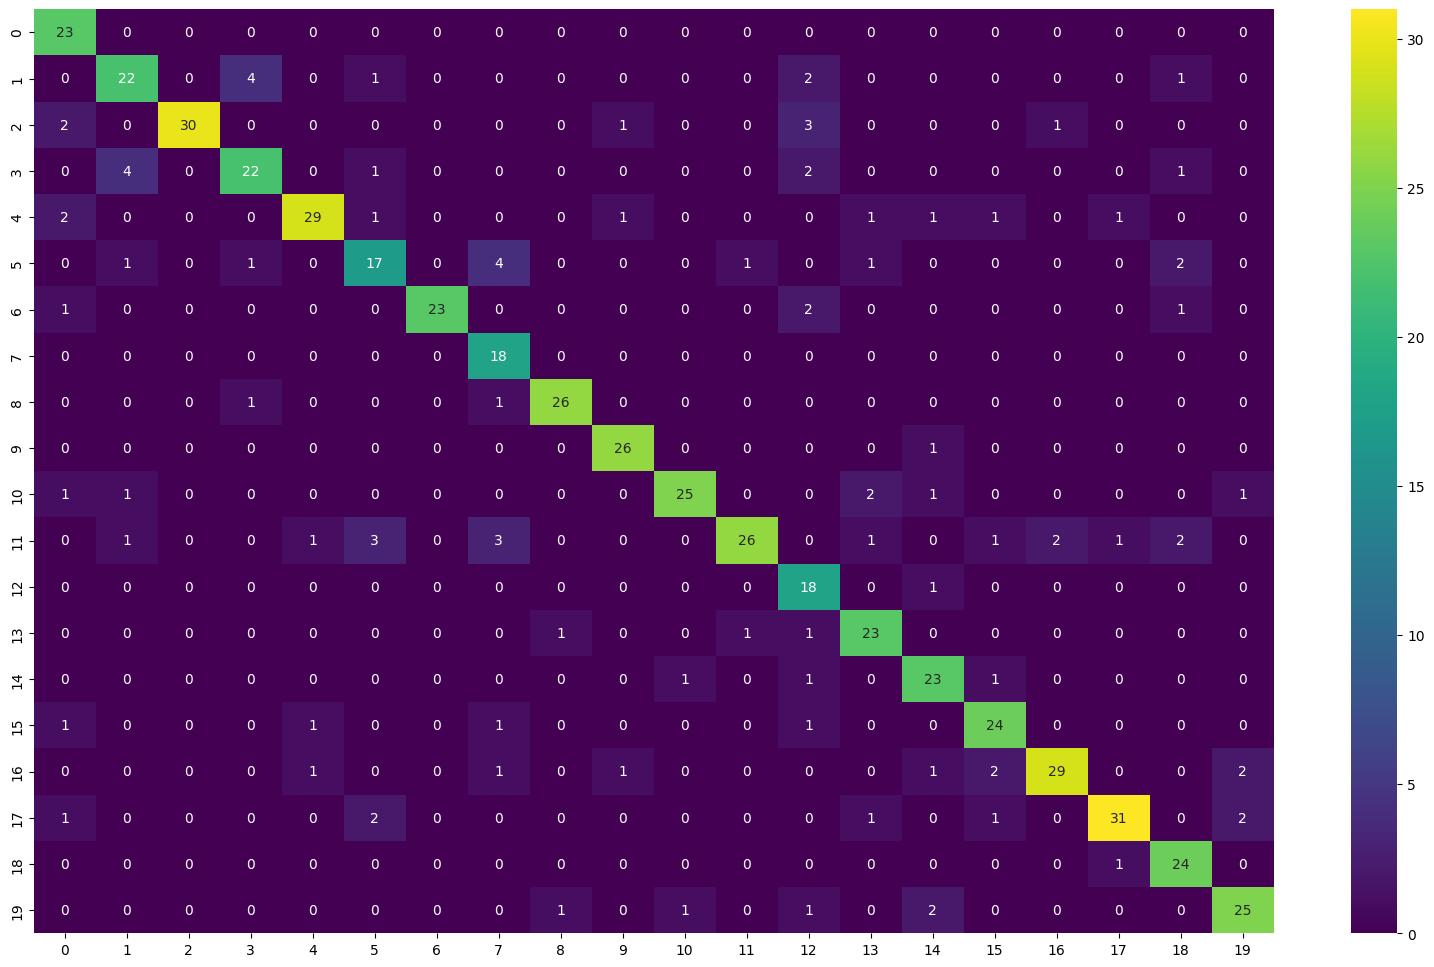

In [29]:
plt.figure(figsize=[20,12])
sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt="d",cmap="viridis");

In [30]:
import pickle

In [31]:
filename = 'foodanalysis.pkl'

# Save model (serialize)
pickle.dump(model, open(filename, 'wb'))

# Load model (de-serialize)
pickle.load(open(filename, 'rb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\activation_17
......vars
...layers\functional\layers\activation_18
......vars
...layers\functional\layers\activation_19
......vars
...layers\functional\layers\activation_2
......vars
...layers\functional\layers\activation_20
......vars
...layers\functional\layers\activation_21
......vars
...layers\fu